## Implementation of Clustering algorithm 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head() # display top 5 observation

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
data.tail() # display last 5 observation

,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


In [5]:
# Create dataset for containing Annual Income and Spending Score
df = data.iloc[:,2:]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Elbow method for choosing number of cluster(value of k) for KMean Clustering 

C:\Users\Ashish\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


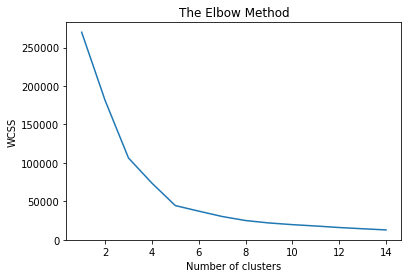

In [6]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Implement KMean Algorithm with k = 5

In [7]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [8]:
# Looking at the points which belong to Cluster 0
df[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


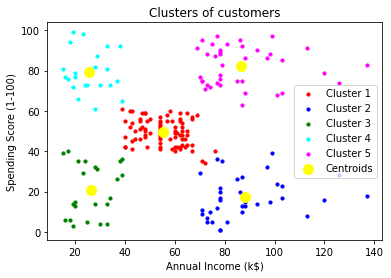

In [9]:
# Visualising the clusters
plt.scatter(df[y_kmeans == 0]['Annual Income (k$)'], df[y_kmeans == 0]['Spending Score (1-100)'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1]['Annual Income (k$)'], df[y_kmeans == 1]['Spending Score (1-100)'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2]['Annual Income (k$)'], df[y_kmeans == 2]['Spending Score (1-100)'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_kmeans == 3]['Annual Income (k$)'], df[y_kmeans == 3]['Spending Score (1-100)'], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[y_kmeans == 4]['Annual Income (k$)'], df[y_kmeans == 4]['Spending Score (1-100)'], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [10]:
# predict the cluster number to which the data point (3,3) belongs
test = kmeans.predict(np.asarray([[3,3]]))
test

array([2])

In [11]:
# saving the model to the local file system
import pickle
filename = 'kmean_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

## Custom Centroid Initialization

If we already know approximately where the centroids should be, then we can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:


for example :- 

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

## Hierarchical clustering

One of the main disadvantages of KMeans is that it requires us to pre-enter the number of clusters (K). Hierarchical clustering is an alternative approach that does not require us to give a value of K in advance and also creates a nice tree structure for easy visualization.

Here we will discuss the bottom-up (or agglomeration) approach to building clusters.
We start by identifying any  similarity between the data points. In general, we consider the Euclidean distance. Points that are closer  are more similar than  points that are further away.  Algorithms start by treating all points as distinct clusters, and then group pins together to form clusters.


The idea behind linkage clustering, or hierarchical clustering, is to put things that are close together into the same cluster. Linkage clustering is usually based on distances only.

**Code Example**

In [12]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,0.358979,0.933346
1,0.182089,0.983282
2,0.936329,0.351123
3,0.203446,0.979086
4,0.391141,0.920331


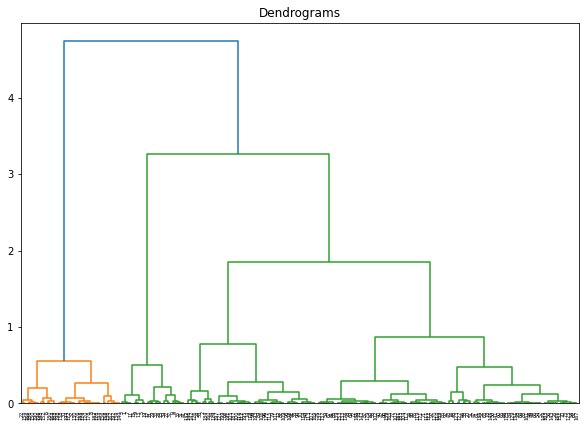

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 3.5 and cut the dendrogram

We can "cut" the dendrogram to form flat clusters. If we cut the above diagram into two clusters, we get a good answer.

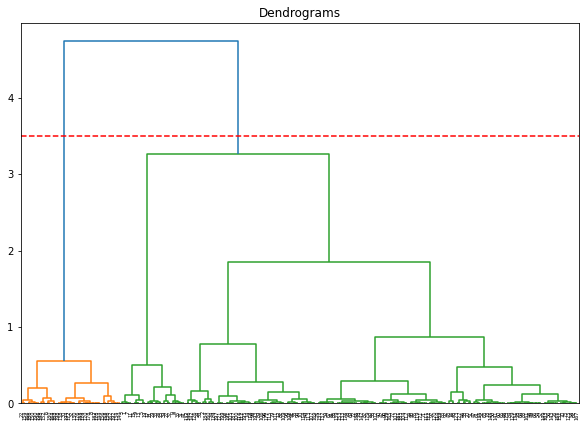

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=3.5, color='r', linestyle='--')

**Linkage Methods**

Since clusters are sets of points, there are many different kinds of linkage methods:

- Single Linkage: cluster distance = smallest pairwise distance
- Complete Linkage: cluster distance = largest pairwise distance
- Average Linkage: cluster distance = average pairwise distance
- Ward’s Linkage: cluster criteria= Minimize the variance in the cluster


**Single Linkage:** Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with an unusual structure


In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(data_scaled)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

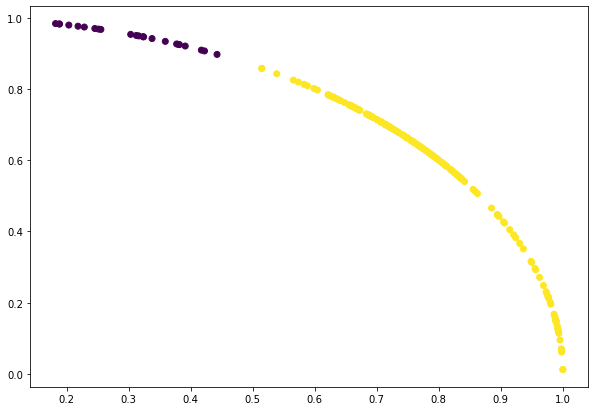

In [17]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_) 

**Complete Linkage:** Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage


In [18]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data_scaled)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

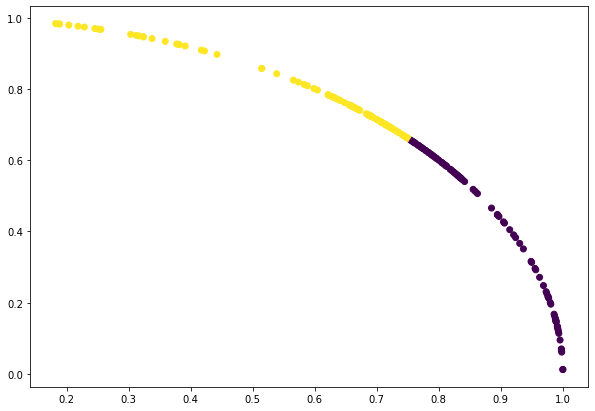

In [19]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_) 

**Average Linkage:** Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.


- cluster distance is the average distance of all pairs of points in clusters 1 and 2


In [20]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(data_scaled)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

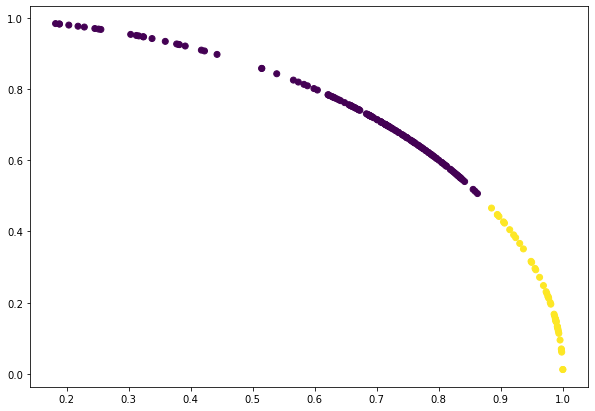

In [21]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_) 

**Ward linkage:** Wikipidea says _Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging._

- based on minimizing a variance criterion before and after merging


In [22]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

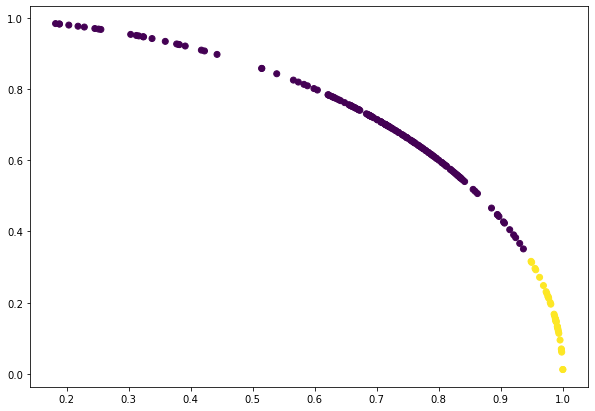

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_) 